In [ ]:
import matplotlib.pyplot as plt
# Create labels for the x-axis (temperature ranges)
import pandas as pd
import numpy as np
import os
from datetime import datetime, timedelta
import sys
parent_dir = os.path.dirname(os.environ["GTE_DIR"].replace("Glaciation_time_estimator",""))
GTE_DIR=os.environ["GTE_DIR"]
sys.path.insert(0, parent_dir)
from Glaciation_time_estimator.Auxiliary_func.config_reader import read_config
from Glaciation_time_estimator.Data_postprocessing.Job_result_fp_generator import generate_tracking_filenames
import seaborn as sns

In [ ]:
config=read_config(os.path.join(GTE_DIR,'config_half.yaml'))
t_deltas = config['t_deltas']
agg_fact = config['agg_fact']
min_temp_array, max_temp_array = config['min_temp_arr'],config['max_temp_arr']
folder_name=f"{config['start_time'].strftime(config['time_folder_format'])}_{config['end_time'].strftime(config['time_folder_format'])}"

In [ ]:
glaciation_counter_strong=0
cloud_count=np.empty((len(config['pole_folders']),len(min_temp_array)))
glaciation_counter_strong=np.zeros(len(config['pole_folders']))
for i in range(len(min_temp_array)):
    for j in range(len(config['pole_folders'])):
        min_temp=min_temp_array[i]
        max_temp=max_temp_array[i]
        df=cloud_properties_df_list[i][j]
        total=df['is_liq']+df['is_mix']+df['is_ice']
        total=df['is_liq'].size
        glaciation_counter_strong[j]+=(df['is_liq']& df['is_mix'] & df['is_ice']).astype(bool).sum(axis=0)
        cloud_count[j,i]=total
        

In [ ]:
glaciation_counter_temp_agg_1=np.zeros(len(min_temp_array))
for i in range(len(min_temp_array)):
    min_temp=min_temp_array[i]
    max_temp=max_temp_array[i]
    df=cloud_properties_df_list[i][0]
    glaciation_counter_temp_agg_1[i]+=(df['is_liq']& df['is_mix'] & df['is_ice']).astype(bool).sum(axis=0)
    df=cloud_properties_df_list[i][1]
    glaciation_counter_temp_agg_1[i]+=(df['is_liq']& df['is_mix'] & df['is_ice']).astype(bool).sum(axis=0)


NameError: name 'agg_fact_list' is not defined

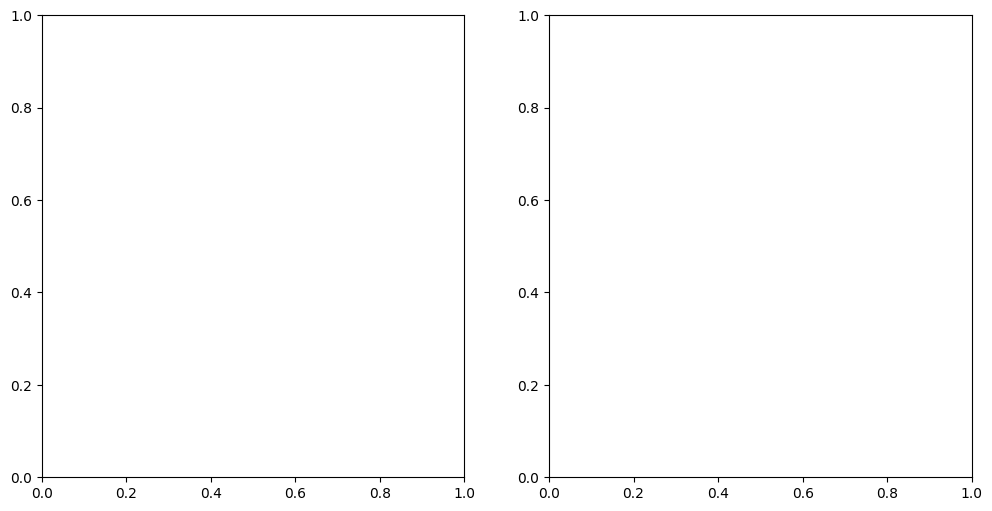

In [ ]:
from datetime import timedelta
start_ice_content_list=[]
higher_final_IF_counter_temp=np.zeros(len(min_temp_array))
labels = [f"{min_temp_array[i]} to {max_temp_array[i]}" for i in range( len(min_temp_array))]
# Create a figure and two subplots side-by-side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
for i in range(len(min_temp_array)-1,-1,-1):
    agg_fact=agg_fact_list[j]
    min_temp=min_temp_array[i]
    max_temp=max_temp_array[i]
    df=cloud_properties_df_list[i][np.where(agg_fact_list==3)[0][0]]
    # print(df["track_length"]>)
    start_ice_content = Extract_array_from_df(df["start_ice_fraction"][(df["max_ice_fraction"]>ice_cont_crit_frac) & (df["track_length"]>timedelta(minutes=60))])
    if start_ice_content is not None:
        end_ice_content = Extract_array_from_df(df["end_ice_fraction"][(df["max_ice_fraction"]>ice_cont_crit_frac) & (df["track_length"]>timedelta(minutes=60))])
        higher_final_IF_counter_temp[i]=(start_ice_content.mean(axis=1)<end_ice_content.mean(axis=1)).sum()
        bins=np.linspace(0,0.2,10)
        ax1.hist(np.var(start_ice_content,axis=1),bins=bins,label=labels[i])
        ax2.hist(np.var(start_ice_content,axis=1),bins=bins,label=labels[i])
ax1.set_xlim(0,0.2)
ax2.set_xlim(0,0.2)
ax1.set_title("First 1h")
ax2.set_title("Last 1h")
ax1.set_xlabel("Variance")
ax2.set_xlabel("Variance")
ax1.set_ylabel("Cloud number")
ax2.set_ylabel("Cloud number")
fig.suptitle("Variance of ice concentraion at start and end of track")
ax1.legend()
ax2.legend()
plt.savefig('/cluster/work/climate/dnikolo/n2o/Glaciation_time_estimatior/Result_graphs/ice_content_variance_hist.png', dpi=400)
higher_final_IF_counter_temp

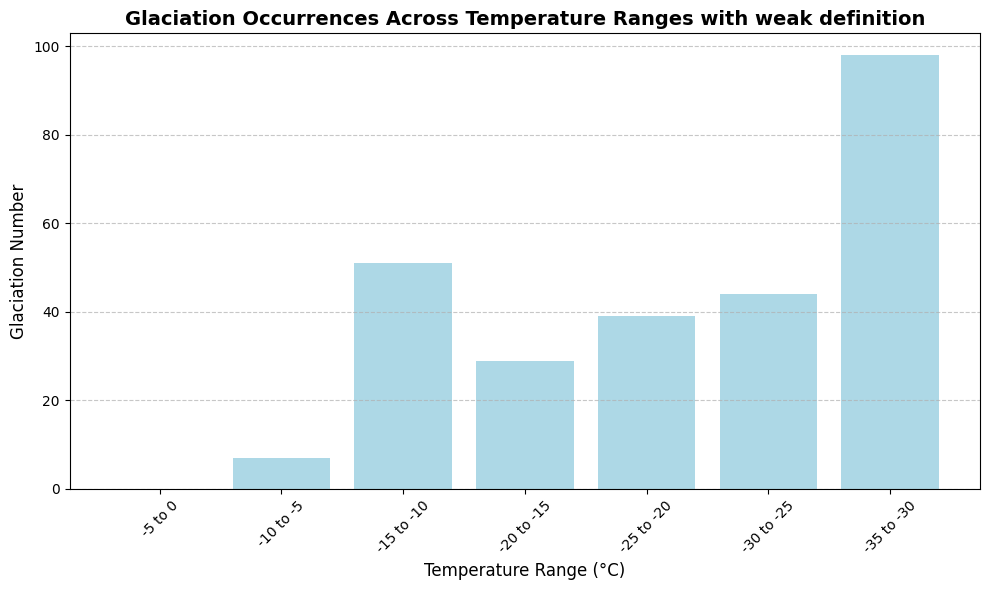

In [ ]:
# Create labels for the x-axis (temperature ranges)
labels = [f"{min_temp_array[i]} to {max_temp_array[i]}" for i in range( len(min_temp_array))]

# Create the bar graph
plt.figure(figsize=(10, 6))
plt.bar(labels, higher_final_IF_counter_temp, color='lightblue', label="N glaciations")

# Add title and labels
plt.title('Glaciation Occurrences Across Temperature Ranges with weak definition', fontsize=14, fontweight='bold')
plt.xlabel('Temperature Range (°C)', fontsize=12)
plt.ylabel('Glaciation Number', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add gridlines for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Format y-axis to show only integer values
plt.gca().yaxis.get_major_locator().set_params(integer=True)

# Show the plot
plt.tight_layout()
plt.savefig('/cluster/work/climate/dnikolo/n2o/Glaciation_time_estimatior/Result_graphs/glaciation_counter_temp_weak_def.png', dpi=400)
plt.show()

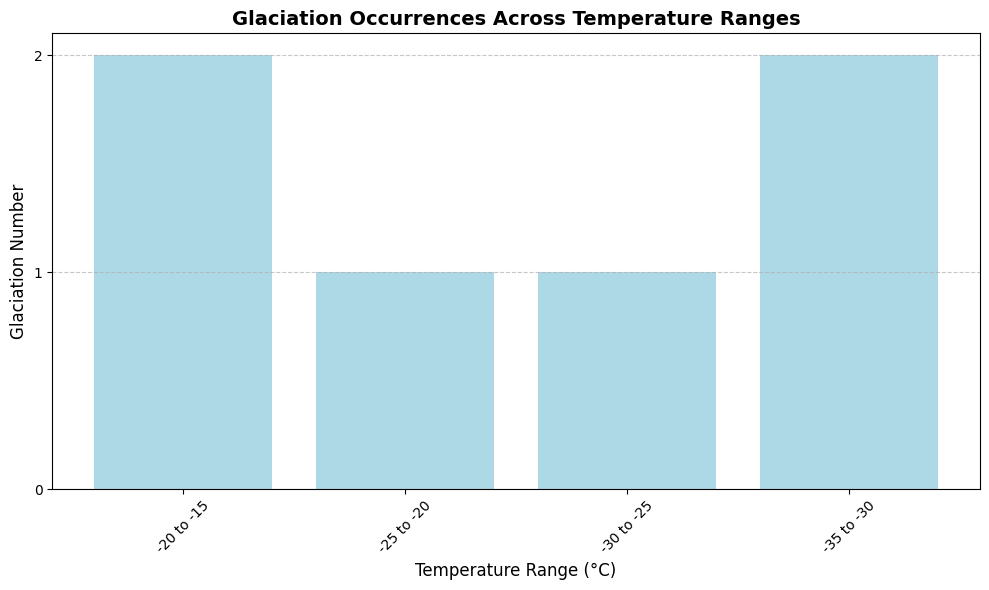

In [ ]:

# Create labels for the x-axis (temperature ranges)
labels = [f"{min_temp_array[i]} to {max_temp_array[i]}" for i in range(3, len(min_temp_array))]

# Create the bar graph
plt.figure(figsize=(10, 6))
plt.bar(labels, glaciation_counter_temp_agg_1[3:], color='lightblue', label="N glaciations")

# Add title and labels
plt.title('Glaciation Occurrences Across Temperature Ranges', fontsize=14, fontweight='bold')
plt.xlabel('Temperature Range (°C)', fontsize=12)
plt.ylabel('Glaciation Number', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add gridlines for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Format y-axis to show only integer values
plt.gca().yaxis.get_major_locator().set_params(integer=True)

# Show the plot
plt.tight_layout()
plt.savefig('/cluster/work/climate/dnikolo/n2o/Glaciation_time_estimatior/Result_graphs/glaciation_counter_temp_1.png', dpi=400)
plt.show()

In [ ]:
tmp_bin_array=np.arange(-80,81,10)
# tmp_bin_array

In [ ]:
glaciation_counter_temp_agg_3=np.zeros(len(min_temp_array))
tmp_bins=pd.IntervalIndex.from_arrays(tmp_bin_array[0:-1],tmp_bin_array[1:])
# lat_bin_df= pd.DataFrame(np.zeros(len(tmp_bin_array)-1), index=tmp_bins,columns=["n_clouds"])
lat_bin_df = pd.DataFrame(np.zeros((len(tmp_bin_array) - 1,3)), index=tmp_bins, columns=["n_clouds", "cloud_area_sum", "cloud_px_sum"])


# Drop the biggest and smallest cloud from each group
def drop_min_max(group):
    n_drop=2
    if len(group) > n_drop*2:  # Ensure group has more than two elements
        group = group.sort_values("avg_size[km]")
        return group.iloc[n_drop:-n_drop]  # Drop first and last rows
    return group  # Return an empty DataFrame if not enough rows
combined_df=None
for i in range(len(min_temp_array)):
    agg_fact = agg_fact_list[j]
    min_temp = min_temp_array[i]
    max_temp = max_temp_array[i]
    
    df = cloud_properties_df_list[i][np.where(agg_fact_list == 3)[0][0]]
    
    glaciation_counter_temp_agg_3[i] += (df['is_liq'] & df['is_mix'] & df['is_ice']).astype(bool).sum(axis=0)
    df=df[df['avg_lat'].notna()]
    df=df[df['avg_size[km]'].notna()]
    df["lat_bin"] = pd.cut(df['avg_lat'], tmp_bin_array)
    
    # Filter rows where max_ice_fraction > 0
    filtered_df = df[df["max_ice_fraction"] > ice_cont_crit_frac]
    if combined_df is not None:
        combined_df=pd.concat([combined_df,filtered_df],axis=0)
    else:
        combined_df=filtered_df.copy()
    filtered_df = filtered_df.groupby("lat_bin", group_keys=False).apply(drop_min_max)
    # Group by lat_bin and perform sum on "avg_size[km]"
    
    groups = filtered_df.groupby("lat_bin")
    
    # Update lat_bin_df for filtered data
    # Compute group sums and means
    group_sums_km = groups["avg_size[km]"].sum()
    group_sums_px = groups["avg_size[px]"].sum()

    # Fill NaN values in means with 0 (or another default value if necessary)
    # group_means = group_means.fillna(0)

    # Update lat_bin_df DataFrame
    lat_bin_df["cloud_px_sum"] += group_sums_px
    lat_bin_df["cloud_area_sum"] += group_sums_km
    lat_bin_df["n_clouds"] += groups.size()
    # lat_bin_df["time"]
    # # Debugging Outputs
    # print("sum:", group_sums)
    # print("mean:", group_means)
print(lat_bin_df["cloud_area_sum"]/lat_bin_df["n_clouds"],lat_bin_df["cloud_px_sum"]/lat_bin_df["n_clouds"])
# lat_bin_df["n_clouds"]
# lat_bin_df["n_clouds"]
# pd.cut(df[df["max_ice_fraction"]>0]['avg_lat'].dropna(), tmp_bin_array)


(-80, -70]    4941.455517
(-70, -60]    4600.961400
(-60, -50]    4115.115581
(-50, -40]    4063.301313
(-40, -30]    4094.056660
(-30, -20]    3044.236044
(-20, -10]    3997.495236
(-10, 0]      3641.249844
(0, 10]       6069.644110
(10, 20]      4788.047303
(20, 30]      3260.355526
(30, 40]      4472.922781
(40, 50]      6562.347061
(50, 60]      4474.551327
(60, 70]      5975.083065
(70, 80]      5041.483869
dtype: float64 (-80, -70]    74.880283
(-70, -60]    44.804913
(-60, -50]    29.126498
(-50, -40]    22.900683
(-40, -30]    19.737712
(-30, -20]    13.136849
(-20, -10]    16.160271
(-10, 0]      14.239802
(0, 10]       23.761573
(10, 20]      19.079167
(20, 30]      14.411111
(30, 40]      21.207501
(40, 50]      35.762537
(50, 60]      30.083229
(60, 70]      61.754051
(70, 80]      77.855367
dtype: float64


/scratch/tmp.16922307.dnikolo/ipykernel_3306343/1930954595.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  filtered_df = filtered_df.groupby("lat_bin", group_keys=False).apply(drop_min_max)
/scratch/tmp.16922307.dnikolo/ipykernel_3306343/1930954595.py:33: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  filtered_df = filtered_df.groupby("lat_bin", group_keys=False).apply(drop_min_max)
/scratch/tmp.16922307.dnikolo/ipykernel_3306343/1930954595.py:36: FutureWarning: The default of observed=False is deprecate

In [ ]:
lat_bin_df["median_px_size"]=combined_df.groupby("lat_bin")["avg_size[px]"].median()
lat_bin_df["median_area"]=combined_df.groupby("lat_bin")["avg_size[km]"].median()
lat_bin_df["median_area"]

/scratch/tmp.16922307.dnikolo/ipykernel_3306343/2229431072.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lat_bin_df["median_px_size"]=combined_df.groupby("lat_bin")["avg_size[px]"].median()
/scratch/tmp.16922307.dnikolo/ipykernel_3306343/2229431072.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lat_bin_df["median_area"]=combined_df.groupby("lat_bin")["avg_size[km]"].median()


(-80, -70]    3164.243972
(-70, -60]    3472.371675
(-60, -50]    3385.981823
(-50, -40]    3520.667010
(-40, -30]    2960.019975
(-30, -20]    2863.124444
(-20, -10]    3155.645451
(-10, 0]      2713.273186
(0, 10]       3734.081006
(10, 20]      5105.292566
(20, 30]      3086.595274
(30, 40]      3896.920705
(40, 50]      4872.629149
(50, 60]      3391.044116
(60, 70]      3541.842944
(70, 80]      3397.659840
Name: median_area, dtype: float64

In [ ]:
combined_df["ice_frac_hist"]

30                           [0.0, 0.0, 0.0, 0.125, 0.0]
140    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
260    [0.125, 0.12121212121212122, 0.108695652173913...
269          [0.0, 0.03703703703703709, 0.0, 0.0, 0.125]
290    [0.050000000000000044, 0.0, 0.0, 0.0, 0.0, 0.0...
                             ...                        
396    [0.375, 0.3783783783783784, 0.28, 0.2653061224...
397    [0.85, 0.8863636363636364, 1.0, 0.837837837837...
398    [0.15384615384615385, 0.13636363636363635, 0.6...
401    [0.10526315789473684, 0.0, 0.11904761904761907...
406                 [0.0, 0.0, 0.0, 0.07692307692307687]
Name: ice_frac_hist, Length: 895, dtype: object

In [ ]:
import seaborn as sns



# either palette works
palette=["#9b59b6", "#3498db", "#95a5a6"]
# palette=['blue', 'red', 'green']

sns.lineplot(data=combined_df, y="ice_frac_hist", color = 'r')#dashes=False)# palette=palette, dashes=False)
plt.show()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

/scratch/tmp.16922307.dnikolo/ipykernel_3306343/882971303.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = combined_df.groupby("lat_bin")


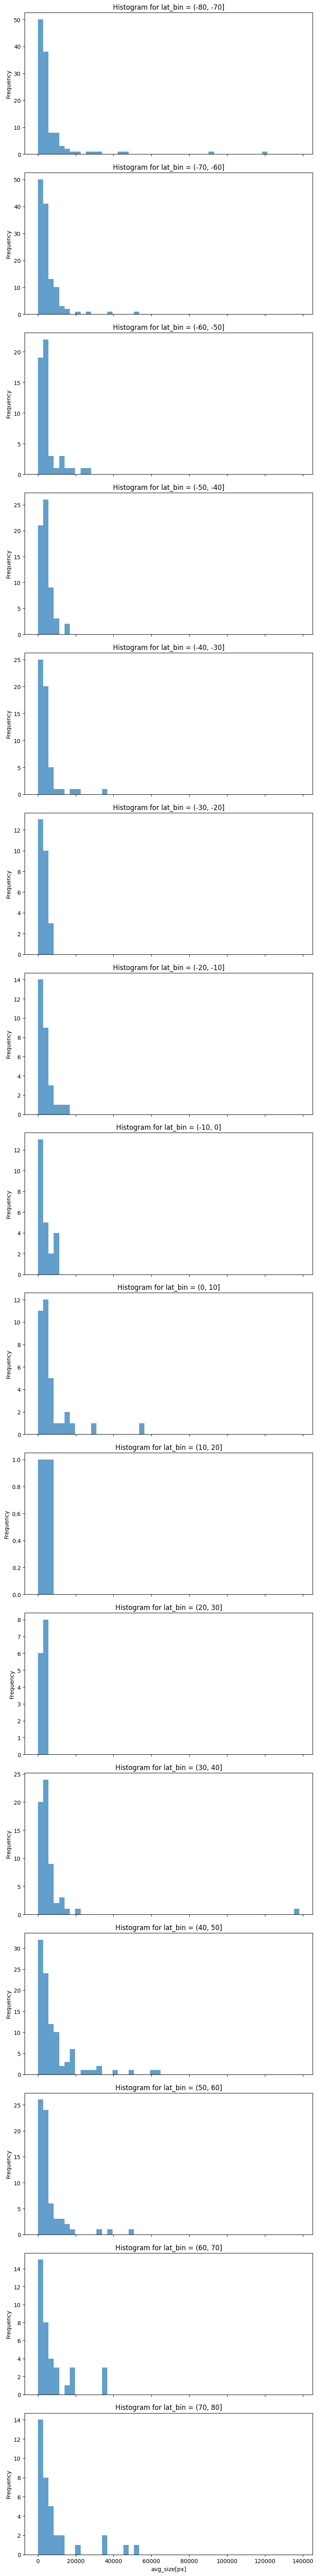

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Example DataFrame setup
# Replace this with your actual combined_df
# combined_df = pd.read_csv("your_file.csv")

# Group by `lat_bin`
groups = combined_df.groupby("lat_bin")
bins=np.linspace(0,combined_df["avg_size[km]"].max(),50)
# combined_df["avg_size[km]"].max()
# Create subplots
fig, axes = plt.subplots(len(groups), 1, figsize=(8, len(groups) * 4), sharex=True)

# Iterate through groups and plot histograms
for (lat_bin, group), ax in zip(groups, axes):
    group["avg_size[km]"].plot(kind='hist', bins=bins, ax=ax, alpha=0.7)
    # ax.hist(group["avg_size[km]"])
    ax.set_title(f'Histogram for lat_bin = {lat_bin}')
    ax.set_xlabel('avg_size[px]')
    ax.set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
combined_df[combined_df["avg_size[km]"]==combined_df["avg_size[km]"].max()]


,is_liq,is_mix,is_ice,max_water_frac,max_ice_fraction,avg_size[km],max_size[km],min_size[km],avg_size[px],max_size[px],...,track_start_time,track_length,glaciation_start_time,glaciation_end_time,avg_lat,avg_lon,start_ice_fraction,end_ice_fraction,ice_frac_hist,lat_bin
811,True,True,False,0.925032,0.339752,138263.412398,172017.818352,97106.832941,696.833333,868,...,2004-02-01 18:45:00,0 days 01:15:00,None,None,39.271632,-61.105217,"[0.07496823379923756, 0.11866359447004604, 0.2...","[0.22267759562841527, 0.27142857142857146, 0.3...","[0.07496823379923756, 0.11866359447004604, 0.2...","(30, 40]"


In [ ]:
# import xarray as xr
# import matplotlib.pyplot as plt
# ds=xr.load_dataset("/cluster/work/climate/dnikolo/Job_output/T-5-0-agg-3/pixel_path_tracking/20040201.1415_20040201.2000/cloudtracks_20040201_161500.nc")
# plt.imshow(ds["tracknumber"][0,:,:])
# plt.colorbar()

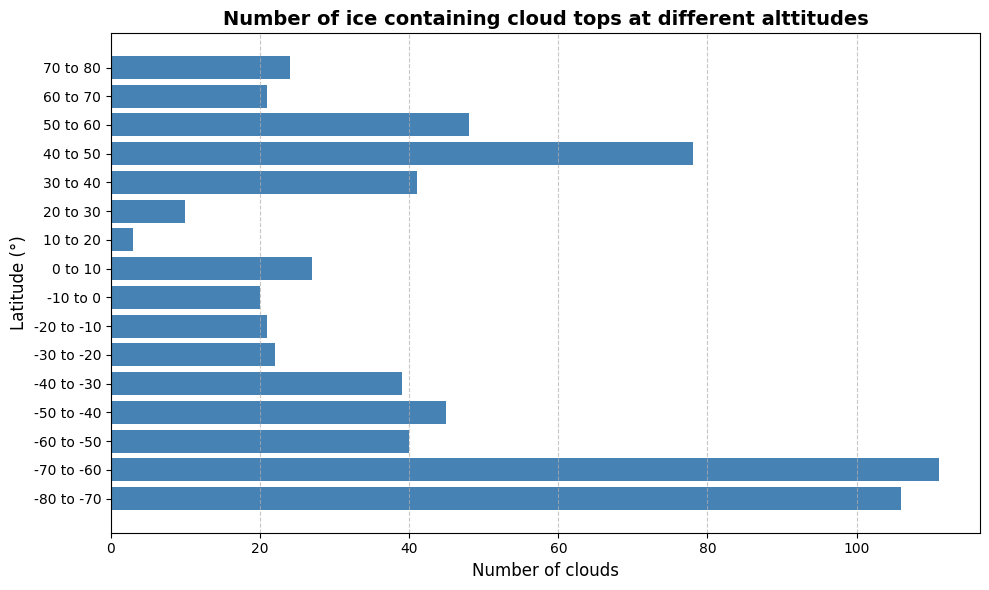

In [ ]:


# Create labels for the y-axis (temperature ranges)
labels = [f"{tmp_bin_array[i]} to {tmp_bin_array[i+1]}" for i in range(len(tmp_bin_array)-1)]

# Create the horizontal bar graph
plt.figure(figsize=(10, 6))

# Add gridlines for better visualization
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Create horizontal bars using plt.barh() instead of plt.bar()
plt.barh(labels, lat_bin_df["n_clouds"], color='#4682B4', label="N glaciations")

# Add title and labels
plt.title('Number of ice containing cloud tops at different alttitudes', fontsize=14, fontweight='bold')
plt.xlabel('Number of clouds', fontsize=12)
plt.ylabel('Latitude (°)', fontsize=12)

# Format x-axis to show only integer values
plt.gca().xaxis.get_major_locator().set_params(integer=True)

# Show the plot
plt.tight_layout()
# plt.savefig('/cluster/work/climate/dnikolo/n2o/Glaciation_time_estimatior/Result_graphs/glaciation_counter_temp_3x3.png', dpi=400)
plt.show()

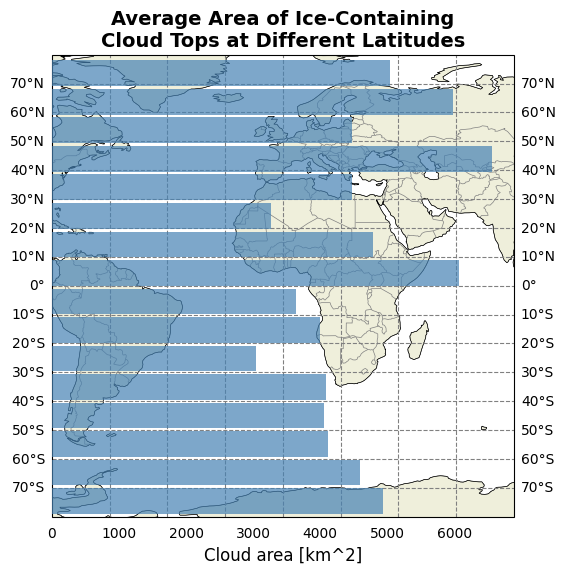

In [ ]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature


# Dummy data for illustration
# tmp_bin_array = [-80, -60, -40, -20, 0, 20, 40, 60, 80]
# lat_bin_df = {"n_clouds": [5, 15, 20, 10, 25, 15, 10, 5]}

# Calculate midpoints and bin widths
latitudes = [(tmp_bin_array[i] + tmp_bin_array[i + 1] -1 ) / 2 for i in range(len(tmp_bin_array) - 1)]
bin_widths = [tmp_bin_array[i + 1] - tmp_bin_array[i] - 1 for i in range(len(tmp_bin_array) - 1)]

# Create the figure and map axes
fig = plt.figure(figsize=(10, 6))
ax_map = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax_map.set_extent([-80, 80, -80, 80], crs=ccrs.PlateCarree())
ax_map.add_feature(cfeature.COASTLINE, edgecolor='black', linewidth=0.5)
ax_map.add_feature(cfeature.BORDERS, edgecolor='gray', linewidth=0.5)
ax_map.add_feature(cfeature.LAND, facecolor='lightgray')
ax_map.add_feature(cfeature.LAND, edgecolor='black', linewidth=0.2)
#n_steps=10,
# Add gridlines with specified latitude lines
gl = ax_map.gridlines(
    
    draw_labels=True,
    color='gray',
    linestyle='--',
    linewidth=0.8
)
gl.top_labels = False  # Disable labels on the top
gl.bottom_labels = False  # Disable labels on the bottom
# gl.right_labels = False  # Disable labels on the right

# Add specific latitudes for gridlines (including top and bottom latitudes)
latitudes_to_show = tmp_bin_array  # Include all latitude bin boundaries
gl.ylocator = plt.FixedLocator(latitudes_to_show)

# Create the second Axes for the bar chart, sharing the same extent
ax_bar = fig.add_axes(ax_map.get_position(), zorder=2)  # Align with the map
ax_bar.barh(latitudes, lat_bin_df["cloud_area_sum"]/lat_bin_df["n_clouds"], color='#4682B4',
            height=bin_widths, zorder=3, alpha=0.7)  # Use `height` for correct bin widths
# ax_bar.set_xscale("log")
# Remove the background of the bar chart (make transparent)
ax_bar.set_facecolor((1, 1, 1, 0))  # RGBA: white background, fully transparent

# Add title and labels for the bar chart
ax_bar.set_title('Average Area of Ice-Containing\nCloud Tops at Different Latitudes', fontsize=14, fontweight='bold')
ax_bar.set_xlabel('Cloud area [km^2]', fontsize=12)

# Remove the bar graph's y-axis labels
ax_bar.set_yticks([])  # Removes tick marks and labels on y-axis

# Set continuous latitude range for y-axis
ax_bar.set_ylim(tmp_bin_array[0] - 1, tmp_bin_array[-1] + 1)  # Full range of latitude bins

# Format x-axis to show only integer values
# ax_bar.xaxis.get_major_locator().set_params(integer=True)

# Hide axes ticks and spines for the bar chart (optional for cleaner overlay)
ax_bar.spines['top'].set_visible(False)
ax_bar.spines['right'].set_visible(False)
ax_bar.spines['left'].set_visible(False)
ax_bar.spines['bottom'].set_visible(False)
ax_bar.tick_params(left=False, bottom=False)

# Save and show the plot
plt.savefig('/cluster/work/climate/dnikolo/n2o/Glaciation_time_estimatior/Result_graphs/Size_avg_ice_conaining_clouds_by_lat.png', dpi=400)
plt.show()


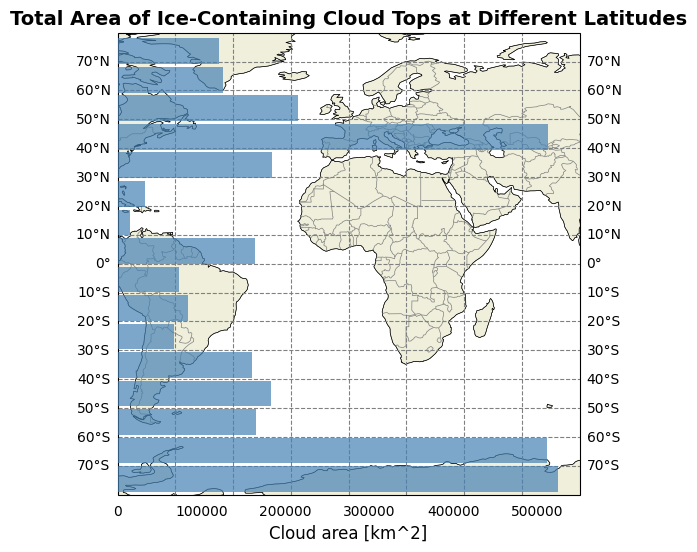

In [ ]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature


# Dummy data for illustration
# tmp_bin_array = [-80, -60, -40, -20, 0, 20, 40, 60, 80]
# lat_bin_df = {"n_clouds": [5, 15, 20, 10, 25, 15, 10, 5]}

# Calculate midpoints and bin widths
latitudes = [(tmp_bin_array[i] + tmp_bin_array[i + 1] -1 ) / 2 for i in range(len(tmp_bin_array) - 1)]
bin_widths = [tmp_bin_array[i + 1] - tmp_bin_array[i] - 1 for i in range(len(tmp_bin_array) - 1)]

# Create the figure and map axes
fig = plt.figure(figsize=(10, 6))
ax_map = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax_map.set_extent([-80, 80, -80, 80], crs=ccrs.PlateCarree())
ax_map.add_feature(cfeature.COASTLINE, edgecolor='black', linewidth=0.5)
ax_map.add_feature(cfeature.BORDERS, edgecolor='gray', linewidth=0.5)
ax_map.add_feature(cfeature.LAND, facecolor='lightgray')
ax_map.add_feature(cfeature.LAND, edgecolor='black', linewidth=0.2)
#n_steps=10,
# Add gridlines with specified latitude lines
gl = ax_map.gridlines(
    
    draw_labels=True,
    color='gray',
    linestyle='--',
    linewidth=0.8
)
gl.top_labels = False  # Disable labels on the top
gl.bottom_labels = False  # Disable labels on the bottom
# gl.right_labels = False  # Disable labels on the right

# Add specific latitudes for gridlines (including top and bottom latitudes)
latitudes_to_show = tmp_bin_array  # Include all latitude bin boundaries
gl.ylocator = plt.FixedLocator(latitudes_to_show)

# Create the second Axes for the bar chart, sharing the same extent
ax_bar = fig.add_axes(ax_map.get_position(), zorder=2)  # Align with the map
ax_bar.barh(latitudes, lat_bin_df["cloud_area_sum"], color='#4682B4',
            height=bin_widths, zorder=3, alpha=0.7)  # Use `height` for correct bin widths
# ax_bar.set_xscale("log")
# Remove the background of the bar chart (make transparent)
ax_bar.set_facecolor((1, 1, 1, 0))  # RGBA: white background, fully transparent

# Add title and labels for the bar chart
ax_bar.set_title('Total Area of Ice-Containing Cloud Tops at Different Latitudes', fontsize=14, fontweight='bold')
ax_bar.set_xlabel('Cloud area [km^2]', fontsize=12)

# Remove the bar graph's y-axis labels
ax_bar.set_yticks([])  # Removes tick marks and labels on y-axis

# Set continuous latitude range for y-axis
ax_bar.set_ylim(tmp_bin_array[0] - 1, tmp_bin_array[-1] + 1)  # Full range of latitude bins

# Format x-axis to show only integer values
# ax_bar.xaxis.get_major_locator().set_params(integer=True)

# Hide axes ticks and spines for the bar chart (optional for cleaner overlay)
ax_bar.spines['top'].set_visible(False)
ax_bar.spines['right'].set_visible(False)
ax_bar.spines['left'].set_visible(False)
ax_bar.spines['bottom'].set_visible(False)
ax_bar.tick_params(left=False, bottom=False)

# Save and show the plot
plt.savefig('/cluster/work/climate/dnikolo/n2o/Glaciation_time_estimatior/Result_graphs/Size_sum_ice_conaining_clouds_by_lat.png', dpi=400)
plt.show()

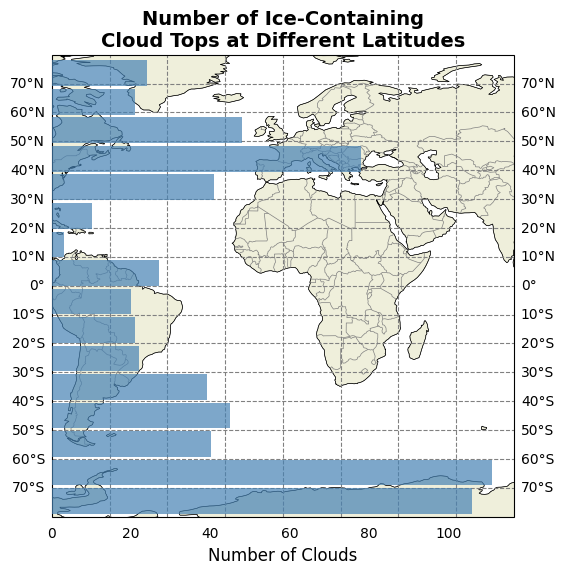

In [ ]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature


# Dummy data for illustration
# tmp_bin_array = [-80, -60, -40, -20, 0, 20, 40, 60, 80]
# lat_bin_df = {"n_clouds": [5, 15, 20, 10, 25, 15, 10, 5]}

# Calculate midpoints and bin widths
latitudes = [(tmp_bin_array[i] + tmp_bin_array[i + 1] -1 ) / 2 for i in range(len(tmp_bin_array) - 1)]
bin_widths = [tmp_bin_array[i + 1] - tmp_bin_array[i] - 1 for i in range(len(tmp_bin_array) - 1)]

# Create the figure and map axes
fig = plt.figure(figsize=(10, 6))
ax_map = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax_map.set_extent([-80, 80, -80, 80], crs=ccrs.PlateCarree())
ax_map.add_feature(cfeature.COASTLINE, edgecolor='black', linewidth=0.5)
ax_map.add_feature(cfeature.BORDERS, edgecolor='gray', linewidth=0.5)
ax_map.add_feature(cfeature.LAND, facecolor='lightgray')
ax_map.add_feature(cfeature.LAND, edgecolor='black', linewidth=0.2)
#n_steps=10,
# Add gridlines with specified latitude lines
gl = ax_map.gridlines(
    
    draw_labels=True,
    color='gray',
    linestyle='--',
    linewidth=0.8
)
gl.top_labels = False  # Disable labels on the top
gl.bottom_labels = False  # Disable labels on the bottom
# gl.right_labels = False  # Disable labels on the right

# Add specific latitudes for gridlines (including top and bottom latitudes)
latitudes_to_show = tmp_bin_array  # Include all latitude bin boundaries
gl.ylocator = plt.FixedLocator(latitudes_to_show)

# Create the second Axes for the bar chart, sharing the same extent
ax_bar = fig.add_axes(ax_map.get_position(), zorder=2)  # Align with the map
ax_bar.barh(latitudes, lat_bin_df["n_clouds"], color='#4682B4',
            height=bin_widths, zorder=3, alpha=0.7)  # Use `height` for correct bin widths

# Remove the background of the bar chart (make transparent)
ax_bar.set_facecolor((1, 1, 1, 0))  # RGBA: white background, fully transparent

# Add title and labels for the bar chart
ax_bar.set_title('Number of Ice-Containing\nCloud Tops at Different Latitudes', fontsize=14, fontweight='bold')
ax_bar.set_xlabel('Number of Clouds', fontsize=12)

# Remove the bar graph's y-axis labels
ax_bar.set_yticks([])  # Removes tick marks and labels on y-axis

# Set continuous latitude range for y-axis
ax_bar.set_ylim(tmp_bin_array[0] - 1, tmp_bin_array[-1] + 1)  # Full range of latitude bins

# Format x-axis to show only integer values
ax_bar.xaxis.get_major_locator().set_params(integer=True)

# Hide axes ticks and spines for the bar chart (optional for cleaner overlay)
ax_bar.spines['top'].set_visible(False)
ax_bar.spines['right'].set_visible(False)
ax_bar.spines['left'].set_visible(False)
ax_bar.spines['bottom'].set_visible(False)
ax_bar.tick_params(left=False, bottom=False)

# Save and show the plot
plt.savefig('/cluster/work/climate/dnikolo/n2o/Glaciation_time_estimatior/Result_graphs/N_ice_conaining_clouds_by_lat.png', dpi=400)
plt.show()



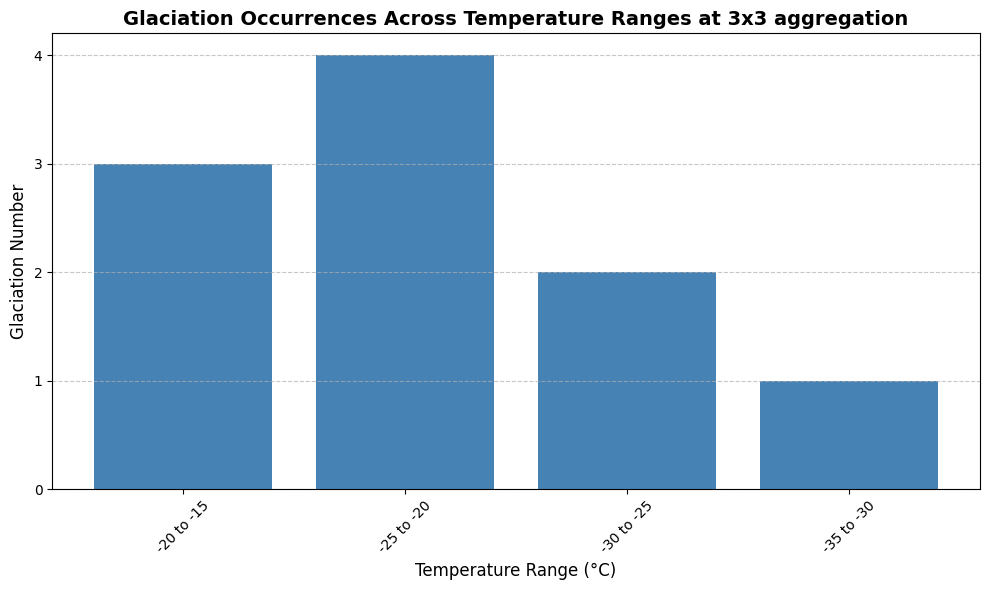

In [ ]:
# Create labels for the x-axis (temperature ranges)
labels = [f"{min_temp_array[i]} to {max_temp_array[i]}" for i in range(3, len(min_temp_array))]

# Create the bar graph
plt.figure(figsize=(10, 6))
# Add gridlines for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.bar(labels, glaciation_counter_temp_agg_3[3:], color='#4682B4', label="N glaciations")

# Add title and labels
plt.title('Glaciation Occurrences Across Temperature Ranges at 3x3 aggregation', fontsize=14, fontweight='bold')
plt.xlabel('Temperature Range (°C)', fontsize=12)
plt.ylabel('Glaciation Number', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)



# Format y-axis to show only integer values
plt.gca().yaxis.get_major_locator().set_params(integer=True)

# Show the plot
plt.tight_layout()
plt.savefig('/cluster/work/climate/dnikolo/n2o/Glaciation_time_estimatior/Result_graphs/glaciation_counter_temp_3x3.png', dpi=400)
plt.show()

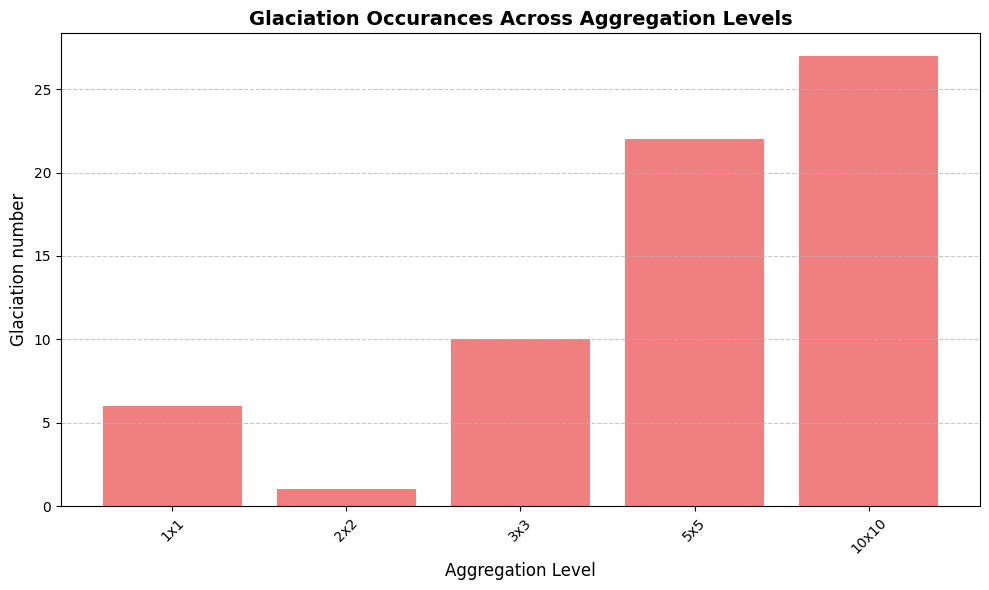

In [ ]:
# # Create labels for the x-axis (temperature ranges)


labels = [f"{agg_fact_list[i]}x{agg_fact_list[i]}" for i in range(len(agg_fact_list))]

# # Create the bar graph
plt.figure(figsize=(10,6))
# plt.bar(labels, n_track_arr[np.where(max_temp_array-min_temp_array==5)], color='skyblue',label="N tracks")
plt.bar(labels, glaciation_counter_strong, color='lightcoral',label="N glaciations")

# Add title and labels
plt.title('Glaciation Occurances Across Aggregation Levels', fontsize=14, fontweight='bold')
plt.xlabel('Aggregation Level', fontsize=12)
plt.ylabel('Glaciation number', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add gridlines for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)
# # Show the plot
plt.tight_layout()
plt.savefig(f'/cluster/work/climate/dnikolo/n2o/Glaciation_time_estimatior/Result_graphs/glaciation_counter_strong.png',dpi=400)
plt.show()

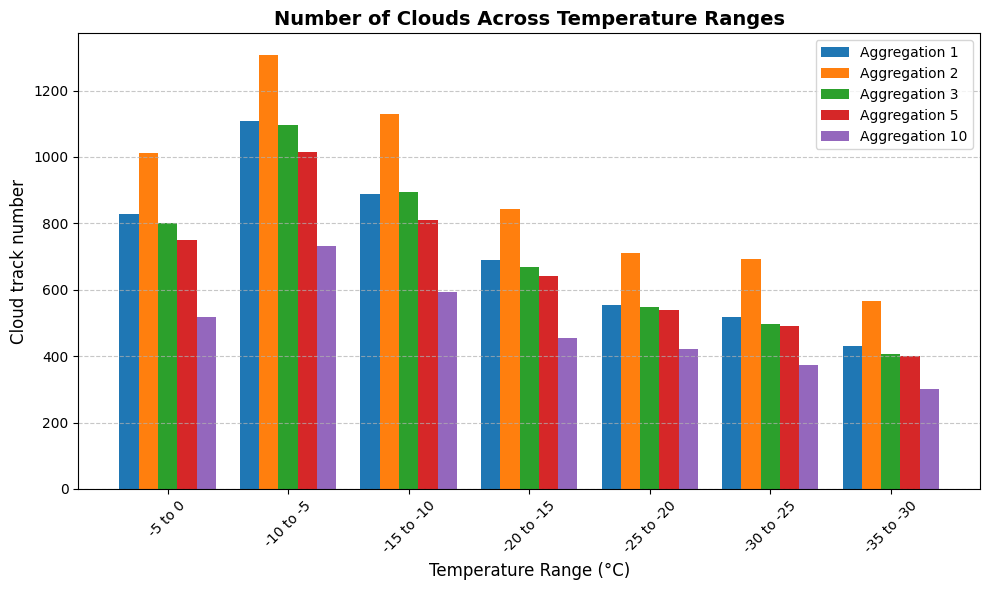

In [ ]:
# Generate labels
labels = [f"{min_temp_array[i]} to {max_temp_array[i]}" for i in range(len(min_temp_array))]
# Set up figure
plt.figure(figsize=(10,6))

# Define bar width and offsets
bar_width = 0.8/len(agg_fact_list)
x = np.arange(len(labels))

# Plot each bar set with an offset
for j in range(len(agg_fact_list)):
    plt.bar(x + j * bar_width, cloud_count[j, :], width=bar_width, label=f"Aggregation {agg_fact_list[j]}")

# Set x-axis labels
plt.xticks(x + (len(agg_fact_list) - 1) * bar_width / 2, labels, rotation=45)

# Add title, labels, and grid
plt.title('Number of Clouds Across Temperature Ranges', fontsize=14, fontweight='bold')
plt.xlabel('Temperature Range (°C)', fontsize=12)
plt.ylabel('Cloud track number', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add legend
plt.legend()

# Adjust layout and show plot
plt.tight_layout()
plt.savefig("/cluster/work/climate/dnikolo/n2o/Glaciation_time_estimatior/Result_graphs/WG_agg_n_clouds_original_included_11_11_tracknumber.png",dpi=400)
plt.show()


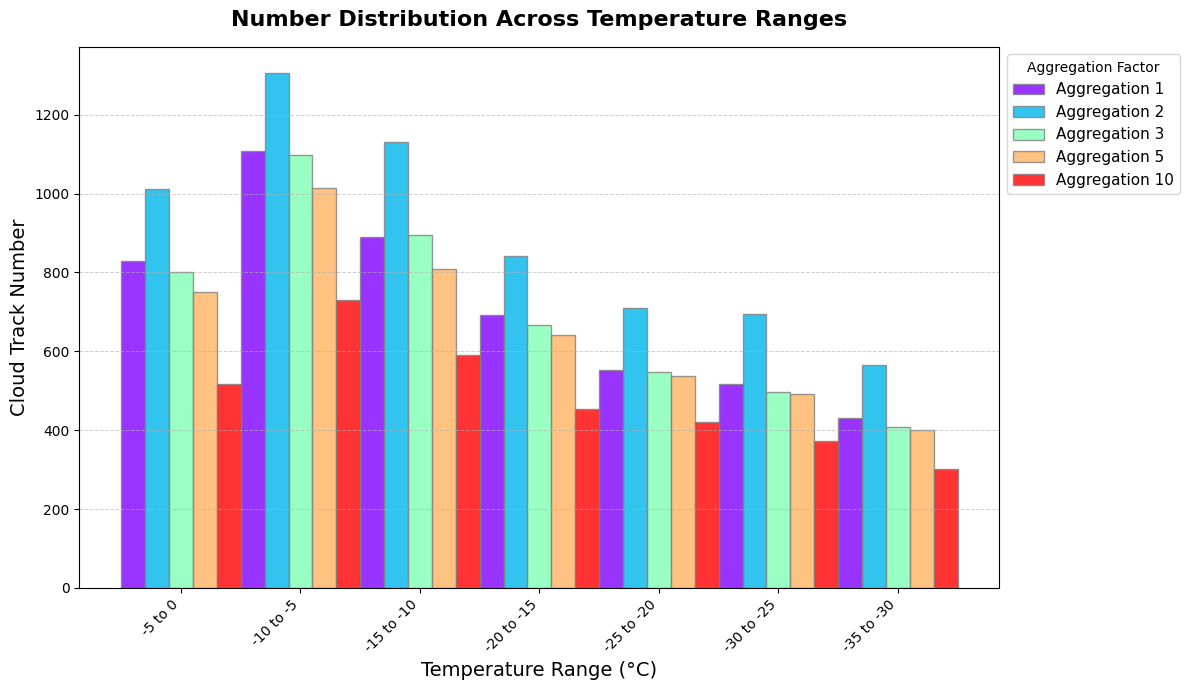

In [ ]:
# Generate labels
labels = [f"{min_temp_array[i]} to {max_temp_array[i]}" for i in range(len(min_temp_array))]

# Set up figure
plt.figure(figsize=(12, 7))

# Define bar width and offsets
bar_width = 0.2
x = np.arange(len(labels))

# Define a rainbow color scheme
colors = plt.cm.rainbow(np.linspace(0, 1, len(agg_fact_list)))

# Plot each bar set with an offset and rainbow color scheme
for j in range(len(agg_fact_list)):
    plt.bar(
        x + j * bar_width, 
        cloud_count[j, :], 
        width=bar_width, 
        color=colors[j], 
        alpha=0.8, 
        edgecolor='grey', 
        label=f"Aggregation {agg_fact_list[j]}"
    )

# Set x-axis labels and align them in the center
plt.xticks(x + (len(agg_fact_list) - 1) * bar_width / 2, labels, rotation=45, ha='right')

# Add title, labels, and a light grid
plt.title('Number Distribution Across Temperature Ranges', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Temperature Range (°C)', fontsize=14)
plt.ylabel('Cloud Track Number', fontsize=14)
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.6)

# Move legend outside the plot area
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title="Aggregation Factor", fontsize=11)

# Adjust layout and show plot
plt.tight_layout()
plt.show()